# MNIST Classification - From MLPs to ConvNets

For this practical we are going to train a small network for digit classification on images. 

First, we are going to train an MLP classifier, using only Dense layers (and dropout). 

Next, we are going to replace the MLP with a ConvNet, using Convolutional Layers, Max Pooling etc. 

Your task is to try variations of the above and compare their performance. Do pay attention to the order of layers in ConvNets and their importance in performance increase. 

### The MNIST Dataset

Keras makes it very easy to use the MNIST dataset by simply loading it. Explore the data and plot it.

In [1]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Printing the 58118th sample with label 7


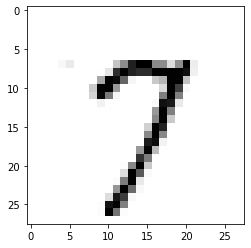

In [3]:
import matplotlib.pyplot as plt
#% matplotlib inline
import random

n_th_image = random.randint(0, x_train.shape[0])  # We print a random image every time
print(f"Printing the {n_th_image}th sample with label {y_train[n_th_image]}")
plt.imshow(x_train[n_th_image], cmap='Greys')

#### Some technicalities 

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


#### Normalizing the images

In [5]:
x_train /= 255
x_test /= 255

## 1. MLP model

Building the MLP model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

mlp_model = Sequential()
mlp_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(10,activation='softmax'))

Training the MLP model

In [7]:
mlp_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
mlp_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.7864 - accuracy: 0.7620 - val_loss: 0.3197 - val_accuracy: 0.9079
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3306 - accuracy: 0.9042 - val_loss: 0.2400 - val_accuracy: 0.9284
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2628 - accuracy: 0.9239 - val_loss: 0.1991 - val_accuracy: 0.9411
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2237 - accuracy: 0.9344 - val_loss: 0.1773 - val_accuracy: 0.9468
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1980 - accuracy: 0.9434 - val_loss: 0.1586 - val_accuracy: 0.9524
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1769 - accuracy: 0.9481 - val_loss: 0.1582 - val_accuracy: 0.9519
Epoch 7/10
60000/60000 [==============================] - 3s 51us/s

In [8]:
mlp_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
mlp_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1252 - accuracy: 0.9625 - val_loss: 0.1165 - val_accuracy: 0.9648
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1179 - accuracy: 0.9654 - val_loss: 0.1074 - val_accuracy: 0.9673
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1117 - accuracy: 0.9663 - val_loss: 0.1045 - val_accuracy: 0.9687
Epoch 4/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1056 - accuracy: 0.9680 - val_loss: 0.0991 - val_accuracy: 0.9696
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0998 - accuracy: 0.9701 - val_loss: 0.1000 - val_accuracy: 0.9685
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0958 - accuracy: 0.9716 - val_loss: 0.0979 - val_accuracy: 0.9689
Epoch 7/20
60000/60000 [==============================] - 4s 68us/st

### TASK 1: Build your own MLP model
Try to use different amount of dense layers, variations of dropout etc. Report your architecture with the best results

In [9]:
my_mlp_model = Sequential()
my_mlp_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

###### YOUR LAYERS HERE

mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(32, activation='tanh'))
mlp_model.add(Dropout(0.20))
mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(Dense(16, activation='tanh'))
mlp_model.add(Dropout(0.20))

# my_mlp_model.add(Dense(??, activation=??))
# my_mlp_model.add(Dropout(??))

############
my_mlp_model.add(Dense(10,activation='softmax'))

my_mlp_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
my_mlp_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.7807 - accuracy: 0.8186 - val_loss: 0.4779 - val_accuracy: 0.8805
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.4554 - accuracy: 0.8807 - val_loss: 0.3989 - val_accuracy: 0.8941
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4025 - accuracy: 0.8917 - val_loss: 0.3660 - val_accuracy: 0.9018
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3761 - accuracy: 0.8968 - val_loss: 0.3476 - val_accuracy: 0.9069
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3594 - accuracy: 0.9008 - val_loss: 0.3348 - val_accuracy: 0.9104
Epoch 6/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.3478 - accuracy: 0.9034 - val_loss: 0.3253 - val_accuracy: 0.9126
Epoch 7/20
60000/60000 [==============================] - 3s 44us/st

In [25]:
my_mlp_model = Sequential()
my_mlp_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

###### YOUR LAYERS HERE

mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(64, activation='tanh'))
mlp_model.add(Dense(64, activation='sigmoid'))
mlp_model.add(Dropout(0.20))

# my_mlp_model.add(Dense(??, activation=??))
# my_mlp_model.add(Dropout(??))

############
my_mlp_model.add(Dense(10,activation='softmax'))

my_mlp_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
my_mlp_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.4682 - accuracy: 0.8777 - val_loss: 0.3076 - val_accuracy: 0.9145
Epoch 2/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.3033 - accuracy: 0.9155 - val_loss: 0.2868 - val_accuracy: 0.9194
Epoch 3/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.2834 - accuracy: 0.9205 - val_loss: 0.2746 - val_accuracy: 0.9233
Epoch 4/30
60000/60000 [==============================] - 3s 49us/step - loss: 0.2731 - accuracy: 0.9236 - val_loss: 0.2670 - val_accuracy: 0.9255
Epoch 5/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.2661 - accuracy: 0.9259 - val_loss: 0.2661 - val_accuracy: 0.9257
Epoch 6/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.2616 - accuracy: 0.9276 - val_loss: 0.2654 - val_accuracy: 0.9256
Epoch 7/30
60000/60000 [==============================] - 3s 48us/st

In [27]:
my_mlp_model = Sequential()
my_mlp_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

###### YOUR LAYERS HERE

mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(64, activation='tanh'))
mlp_model.add(Dropout(0.20))

# my_mlp_model.add(Dense(??, activation=??))
# my_mlp_model.add(Dropout(??))

############
my_mlp_model.add(Dense(10,activation='softmax'))

my_mlp_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
my_mlp_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.4701 - accuracy: 0.8760 - val_loss: 0.3093 - val_accuracy: 0.9149
Epoch 2/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.3039 - accuracy: 0.9151 - val_loss: 0.2808 - val_accuracy: 0.9212
Epoch 3/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.2835 - accuracy: 0.9211 - val_loss: 0.2767 - val_accuracy: 0.9231
Epoch 4/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.2732 - accuracy: 0.9237 - val_loss: 0.2683 - val_accuracy: 0.9255
Epoch 5/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.2660 - accuracy: 0.9263 - val_loss: 0.2661 - val_accuracy: 0.9252
Epoch 6/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.2615 - accuracy: 0.9275 - val_loss: 0.2655 - val_accuracy: 0.9257
Epoch 7/30
60000/60000 [==============================] - 3s 44us/st

## 2. ConvNet

Building the ConvNet model

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Activation

conv_model = Sequential()
conv_model.add(Conv2D(16, kernel_size=(3,3)))
conv_model.add(BatchNormalization())
conv_model.add(Activation('relu'))
conv_model.add(Conv2D(16, kernel_size=(3,3),activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
conv_model.add(Dense(10,activation='softmax'))

Training the ConvNet model

In [ ]:
conv_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
conv_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2116 - accuracy: 0.9359 - val_loss: 0.0880 - val_accuracy: 0.9730
Epoch 2/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0859 - accuracy: 0.9749 - val_loss: 0.0699 - val_accuracy: 0.9750
Epoch 3/5
32352/60000 [===============>..............] - ETA: 64:39:34 - loss: 0.0687 - accuracy: 0.9795

In [12]:
conv_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
conv_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=7)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0639 - accuracy: 0.9809 - val_loss: 0.0483 - val_accuracy: 0.9856
Epoch 2/7
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0518 - val_accuracy: 0.9825
Epoch 3/7
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0438 - val_accuracy: 0.9855
Epoch 4/7
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0482 - val_accuracy: 0.9863
Epoch 5/7
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0576 - val_accuracy: 0.9839
Epoch 6/7
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0622 - val_accuracy: 0.9850
Epoch 7/7
60000/60000 [==============================] - 72s 1ms/step - lo

## TASK 2: Build your own ConvNet
Try different variations of layers, more convolutions, with/without dropout, more/less fully connected layer at the end. Report your best result. 

Optional: Can you build it without fully connected layers at the end? (Hint: Use number of channels in the output)

In [24]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

my_conv_model = Sequential()

##### YOUR LAYERS HERE ######
my_conv_model.add(Conv2D(??, kernel_size=(?,?)))
my_conv_model.add(BatchNormalization())
my_conv_model.add(MaxPooling2D(pool_size=(? ?)))

#############################

my_conv_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
my_conv_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=10)

## Plotting evaluation results

In [6]:
model = conv_model # SET YOUR MODEL HERE (mlp_model, conv_model, my_mlp_model or my_conv_model)
random_index = random.randint(0, x_test.shape[0])
plt.imshow(x_test[random_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[random_index].reshape(1, 28, 28, 1))
print(pred.argmax())

NameError: name 'conv_model' is not defined

## 3. Further experiments

### TASK 3 (optional): Try different normalization techniques and compare results with the previous

### TASK 4 (optional): Try different optimizers (ADAM, RMSProp etc)

### TASK 5 (optional): Compare execution time for 10 epochs of an MLP and a ConvNet with the same number of layers. 
Which one is faster? How does this relate to the number of parameters? What about the computation?

#### Write a list of conclusions here: 

E.g: Dropout is useless in ConvNets, BatchNorm is good etc
